In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("Walmart_Sales.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit
0,1.0,05-02-2010,1643690.90,0.0,42.31,NaN,211.096358,8.0,192261.83
1,1.0,12-02-2010,1641957.44,1.0,38.51,NaN,211.242170,8.0,191792.06
2,NaN,19-02-2010,1611968.17,0.0,39.93,NaN,211.289143,8.0,191050.39
3,1.0,26-02-2010,1409727.59,0.0,46.63,NaN,211.319643,8.0,182901.99
4,1.0,05-03-2010,1554806.68,0.0,46.50,NaN,211.350143,8.0,166187.94


In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [4]:
df['date_year'] = df['Date'].dt.year
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year
3962,28.0,2012-01-13,1161190.29,0.0,48.07,3.657,130.244000,12.0,171416.97240,2012
1521,11.0,2011-11-04,1458287.38,0.0,61.13,3.332,221.245968,7.0,124269.48590,2011
6284,44.0,2012-09-07,338737.33,1.0,70.65,NaN,NaN,5.0,89012.02672,2012
4691,33.0,2012-04-20,261837.20,0.0,72.94,4.111,131.117333,7.0,114373.37460,2012
5290,37.0,2012-10-26,534738.43,0.0,74.39,3.506,222.113657,6.0,147736.01560,2012


In [5]:
df['date_month'] = df['Date'].dt.month
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month
4280,30.0,2012-08-24,425296.65,0.0,77.72,3.620,221.808352,7.0,116273.31870,2012,8
1291,10.0,2010-03-05,1987090.09,0.0,55.92,2.877,126.578286,10.0,181512.13350,2010,3
4267,30.0,2012-05-25,449355.91,0.0,79.49,3.561,221.382803,7.0,117645.31060,2012,5
1469,11.0,2010-11-05,1332759.13,0.0,64.41,2.689,215.276547,8.0,75968.70607,2010,11
3333,24.0,2010-12-10,1593012.75,0.0,27.11,3.255,132.676400,8.0,73790.26307,2010,12


In [6]:
df['date_day'] = df['Date'].dt.day
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month,date_day
2353,17.0,2011-05-06,882132.28,0.0,45.66,3.744,129.044433,7.0,182641.50670,2011,5,6
1684,12.0,2012-03-23,1045419.87,0.0,56.26,4.038,130.896645,12.0,144805.79620,2012,3,23
5371,38.0,2011-08-19,362224.70,0.0,91.74,3.743,129.240581,14.0,65181.56893,2011,8,19
2027,15.0,2010-07-30,619224.06,0.0,NaN,2.932,132.598387,8.0,105008.31000,2010,7,30
852,6.0,2012-09-21,1425603.65,0.0,70.81,3.721,224.401719,6.0,99201.15990,2012,9,21


In [7]:
df['date_dow'] = df['Date'].dt.dayofweek
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month,date_day,date_dow
0,1.0,2010-02-05,1643690.90,0.0,42.31,NaN,211.096358,8.0,192261.83,2010,2,5,4
1,1.0,2010-02-12,1641957.44,1.0,38.51,NaN,211.242170,8.0,191792.06,2010,2,12,4
2,NaN,2010-02-19,1611968.17,0.0,39.93,NaN,211.289143,8.0,191050.39,2010,2,19,4
3,1.0,2010-02-26,1409727.59,0.0,46.63,NaN,211.319643,8.0,182901.99,2010,2,26,4
4,1.0,2010-03-05,1554806.68,0.0,46.50,NaN,211.350143,8.0,166187.94,2010,3,5,4


In [8]:
df['date_is_weekend'] = np.where(df['date_dow'].isin([5,6]), 1,0)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month,date_day,date_dow,date_is_weekend
0,1.0,2010-02-05,1643690.90,0.0,42.31,NaN,211.096358,8.0,192261.83,2010,2,5,4,0
1,1.0,2010-02-12,1641957.44,1.0,38.51,NaN,211.242170,8.0,191792.06,2010,2,12,4,0
2,NaN,2010-02-19,1611968.17,0.0,39.93,NaN,211.289143,8.0,191050.39,2010,2,19,4,0
3,1.0,2010-02-26,1409727.59,0.0,46.63,NaN,211.319643,8.0,182901.99,2010,2,26,4,0
4,1.0,2010-03-05,1554806.68,0.0,46.50,NaN,211.350143,8.0,166187.94,2010,3,5,4,0


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [10]:
df.isnull().mean()*100

Store              0.714841
Date               0.000000
Weekly_Sales       0.000000
Holiday_Flag       1.989122
Temperature        2.175602
Fuel_Price         0.932401
CPI                0.543901
Unemployment       3.387723
Profit             3.139083
date_year          0.000000
date_month         0.000000
date_day           0.000000
date_dow           0.000000
date_is_weekend    0.000000
dtype: float64

In [11]:
# We decide that we remove data which is missing by less than 1%.

In [12]:
l = [col for col in df.columns if df[col].isnull().mean()<0.01 and df[col].isnull().mean()>0]
l

['Store', 'Fuel_Price', 'CPI']

In [13]:
# We do not do Complete Case Analysis on Fuel Price because a set of values or missing
l = l[0:3:2]

In [14]:
l

['Store', 'CPI']

In [15]:
df.dropna(subset = l, inplace=True)

In [16]:
df.isna().mean()*100

Store              0.000000
Date               0.000000
Weekly_Sales       0.000000
Holiday_Flag       1.809884
Temperature        2.108908
Fuel_Price         0.645263
CPI                0.000000
Unemployment       3.289267
Profit             3.021719
date_year          0.000000
date_month         0.000000
date_day           0.000000
date_dow           0.000000
date_is_weekend    0.000000
dtype: float64

In [17]:
 def random_sampling_imputation(column):
        non_missing_values = df[column].dropna()
        random_samples = np.random.choice(non_missing_values, size=df[column].isnull().sum(), replace=True)
        df.loc[df[column].isnull(), column] = random_samples

In [18]:
random_sampling_imputation('Holiday_Flag')

In [19]:
df.isna().mean()*100

Store              0.000000
Date               0.000000
Weekly_Sales       0.000000
Holiday_Flag       0.000000
Temperature        2.108908
Fuel_Price         0.645263
CPI                0.000000
Unemployment       3.289267
Profit             3.021719
date_year          0.000000
date_month         0.000000
date_day           0.000000
date_dow           0.000000
date_is_weekend    0.000000
dtype: float64

In [20]:
def random_sampling_imputation(column):
        non_missing_values = df[column].dropna()
        random_samples = np.random.choice(non_missing_values, size=df[column].isnull().sum(), replace=True)
        df.loc[df[column].isnull(), column] = random_samples

In [21]:
random_sampling_imputation('Holiday_Flag')

Text(0.5, 1.0, 'Temperature')

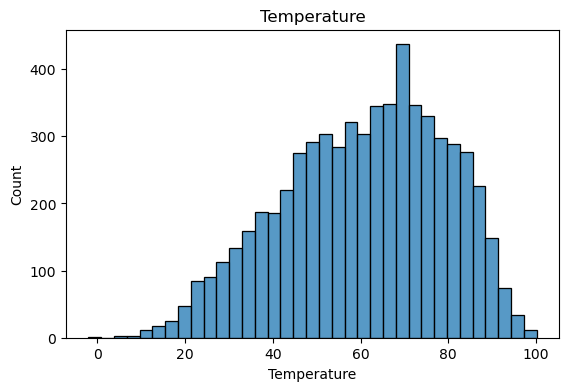

In [22]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(df['Temperature'])
plt.title('Temperature')

In [23]:
def random_sampling_imputation(column):
        non_missing_values = df[column].dropna()
        random_samples = np.random.choice(non_missing_values, size=df[column].isnull().sum(), replace=True)
        df.loc[df[column].isnull(), column] = random_samples

In [24]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Initialize SimpleImputer with median strategy
si = SimpleImputer(strategy='median')

# Impute missing values in 'Temperature' column
df['Temperature'] = si.fit_transform(df[['Temperature']])

# Display the DataFrame after imputation
print(df)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0       1.0 2010-02-05    1643690.90           0.0        42.31         NaN   
1       1.0 2010-02-12    1641957.44           1.0        38.51         NaN   
3       1.0 2010-02-26    1409727.59           0.0        46.63         NaN   
4       1.0 2010-03-05    1554806.68           0.0        46.50         NaN   
5       1.0 2010-03-12    1439541.59           0.0        57.79         NaN   
...     ...        ...           ...           ...          ...         ...   
6429   45.0 2012-09-21     723086.20           0.0        65.32         NaN   
6431   45.0 2012-10-05     733455.07           0.0        64.89         NaN   
6432   45.0 2012-10-12     734464.36           0.0        54.47         NaN   
6433   45.0 2012-10-19     718125.53           0.0        56.47         NaN   
6434   45.0 2012-10-26     760281.43           0.0        58.85         NaN   

             CPI  Unemployment     Profit  date_yea

In [25]:
random_sampling_imputation('Unemployment')

In [26]:
df.isna().sum()

Store                0
Date                 0
Weekly_Sales         0
Holiday_Flag         0
Temperature          0
Fuel_Price          41
CPI                  0
Unemployment         0
Profit             192
date_year            0
date_month           0
date_day             0
date_dow             0
date_is_weekend      0
dtype: int64

In [27]:
df["Fuel_Price"].fillna(df["Fuel_Price"].max(), inplace=True)
print(df)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0       1.0 2010-02-05    1643690.90           0.0        42.31       4.468   
1       1.0 2010-02-12    1641957.44           1.0        38.51       4.468   
3       1.0 2010-02-26    1409727.59           0.0        46.63       4.468   
4       1.0 2010-03-05    1554806.68           0.0        46.50       4.468   
5       1.0 2010-03-12    1439541.59           0.0        57.79       4.468   
...     ...        ...           ...           ...          ...         ...   
6429   45.0 2012-09-21     723086.20           0.0        65.32       4.468   
6431   45.0 2012-10-05     733455.07           0.0        64.89       4.468   
6432   45.0 2012-10-12     734464.36           0.0        54.47       4.468   
6433   45.0 2012-10-19     718125.53           0.0        56.47       4.468   
6434   45.0 2012-10-26     760281.43           0.0        58.85       4.468   

             CPI  Unemployment     Profit  date_yea

In [28]:
def random_sampling_imputation(column):
        non_missing_values = df[column].dropna()
        random_samples = np.random.choice(non_missing_values, size=df[column].isnull().sum(), replace=True)
        df.loc[df[column].isnull(), column] = random_samples

In [29]:
random_sampling_imputation('Unemployment')

In [30]:
df["Profit"].fillna(df["Profit"].max(), inplace=True)
print(df)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0       1.0 2010-02-05    1643690.90           0.0        42.31       4.468   
1       1.0 2010-02-12    1641957.44           1.0        38.51       4.468   
3       1.0 2010-02-26    1409727.59           0.0        46.63       4.468   
4       1.0 2010-03-05    1554806.68           0.0        46.50       4.468   
5       1.0 2010-03-12    1439541.59           0.0        57.79       4.468   
...     ...        ...           ...           ...          ...         ...   
6429   45.0 2012-09-21     723086.20           0.0        65.32       4.468   
6431   45.0 2012-10-05     733455.07           0.0        64.89       4.468   
6432   45.0 2012-10-12     734464.36           0.0        54.47       4.468   
6433   45.0 2012-10-19     718125.53           0.0        56.47       4.468   
6434   45.0 2012-10-26     760281.43           0.0        58.85       4.468   

             CPI  Unemployment     Profit  date_yea

In [31]:
df.isna().sum()

Store              0
Date               0
Weekly_Sales       0
Holiday_Flag       0
Temperature        0
Fuel_Price         0
CPI                0
Unemployment       0
Profit             0
date_year          0
date_month         0
date_day           0
date_dow           0
date_is_weekend    0
dtype: int64

In [32]:
df = df.drop('Date', axis=1)

In [33]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month,date_day,date_dow,date_is_weekend
0,1.0,1643690.90,0.0,42.31,4.468,211.096358,8.0,192261.83,2010,2,5,4,0
1,1.0,1641957.44,1.0,38.51,4.468,211.242170,8.0,191792.06,2010,2,12,4,0
3,1.0,1409727.59,0.0,46.63,4.468,211.319643,8.0,182901.99,2010,2,26,4,0
4,1.0,1554806.68,0.0,46.50,4.468,211.350143,8.0,166187.94,2010,3,5,4,0
5,1.0,1439541.59,0.0,57.79,4.468,211.380643,8.0,156991.12,2010,3,12,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6429,45.0,723086.20,0.0,65.32,4.468,191.856704,9.0,476485.43,2012,9,21,4,0
6431,45.0,733455.07,0.0,64.89,4.468,192.170412,9.0,476485.43,2012,10,5,4,0
6432,45.0,734464.36,0.0,54.47,4.468,192.327265,9.0,476485.43,2012,10,12,4,0
6433,45.0,718125.53,0.0,56.47,4.468,192.330854,9.0,476485.43,2012,10,19,4,0


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df))
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.701178,1.055315,-0.276079,-1.011537,2.363895,0.999472,-0.002593,0.723477,-1.210623,-1.371416,-1.217570,0.0,0.0
1,-1.701178,1.052234,3.622154,-1.219868,2.363895,1.003179,-0.002593,0.717619,-1.210623,-1.371416,-0.419282,0.0,0.0
2,-1.701178,0.639578,-0.276079,-0.774699,2.363895,1.005148,-0.002593,0.606760,-1.210623,-1.371416,1.177295,0.0,0.0
3,-1.701178,0.897373,-0.276079,-0.781826,2.363895,1.005923,-0.002593,0.398337,-1.210623,-1.062836,-1.217570,0.0,0.0
4,-1.701178,0.692555,-0.276079,-0.162866,2.363895,1.006699,-0.002593,0.283653,-1.210623,-1.062836,-0.419282,0.0,0.0


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=[1],axis=1),df[1],test_size=0.3,random_state=1)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test)

print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('R2 Score',r2_score(y_test,y_pred))

MAE 0.7762894237456468
MSE 0.8937380829276024
R2 Score 0.14513669734187318
